In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.faces.faces_data import get_faces_dataset
import common_grid_search_analysis
import TrainingCurves

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

PLOT_PREFIX = "Figures/FACES_NN_PLOT_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/FACES_NN_DATA"

In [2]:
num_nodes_per_layer = [i for i in range(1, 502, 100)]
num_hidden_layers = [i for i in range(1, 12, 2)]

hidden_layer_sizes = []
for num_nodes in num_nodes_per_layer:
    for num_layers in num_hidden_layers:
        tmp_hl = []
        for i in range(num_layers):
            tmp_hl.append(num_nodes)
        hidden_layer_sizes.append(tmp_hl)


hidden_layer_sizes
string_hidden_layer_size = []
for i in hidden_layer_sizes:
    temp = ""
    for ii in i:
        temp += (str(ii) + " ,")
    temp=temp[:-2]
    string_hidden_layer_size.append(temp)

print(hidden_layer_sizes)

[[1], [1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [101], [101, 101, 101], [101, 101, 101, 101, 101], [101, 101, 101, 101, 101, 101, 101], [101, 101, 101, 101, 101, 101, 101, 101, 101], [101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101], [201], [201, 201, 201], [201, 201, 201, 201, 201], [201, 201, 201, 201, 201, 201, 201], [201, 201, 201, 201, 201, 201, 201, 201, 201], [201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201], [301], [301, 301, 301], [301, 301, 301, 301, 301], [301, 301, 301, 301, 301, 301, 301], [301, 301, 301, 301, 301, 301, 301, 301, 301], [301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301], [401], [401, 401, 401], [401, 401, 401, 401, 401], [401, 401, 401, 401, 401, 401, 401], [401, 401, 401, 401, 401, 401, 401, 401, 401], [401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401], [501], [501, 501, 501], [501, 501, 501, 501, 501], [501, 501, 501, 501, 501, 501, 501], [501, 501, 501, 501, 50

In [2]:
import NeuralNetworks.common_NN as common_NN
X_train, X_test, y_train, y_test = get_faces_dataset()
num_features = X_train.shape[1]

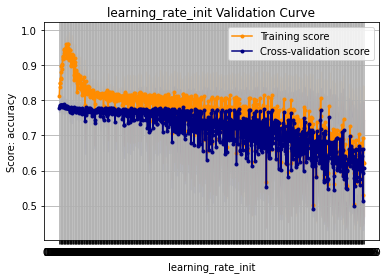

In [12]:
learning_rate_init=[i for i in np.arange(0.0001, 0.1, 0.0001)]

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(MLPClassifier(batch_size=64), X_train, y_train, "learning_rate_init", learning_rate_init, 'accuracy', cv=TrainingCurves.get_cv())


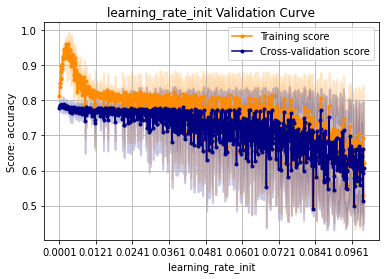

In [18]:
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "learning_rate_init", learning_rate_init, title="learning_rate_init Validation Curve", scoring="accuracy", tick_spacing=120)


In [3]:
learning_rate=['adaptive', 'constant']
learning_rate_init=[0.00001, 0.0001, 0.001, .01, 0.1]
max_iter=[i for i in range(100, 800, 50)]
batch_size=[i for i in range(16, 512, 16)]

parameters = {'learning_rate_init': learning_rate_init, 'max_iter': max_iter, 'batch_size': batch_size}

gs = common_NN.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX)

gs_results = gs

Grid Search Will be Saved to  Analysis_Data/FACES_NN_DATA_learning_rate_adaptive-constant_learning_rate_init_1e-05-0.1_max_iter_100-1000_batch_size_16-2056.pickle
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Saved  Analysis_Data/FACES_NN_DATA_learning_rate_adaptive-constant_learning_rate_init_1e-05-0.1_max_iter_100-1000_batch_size_16-2056.pickle


/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


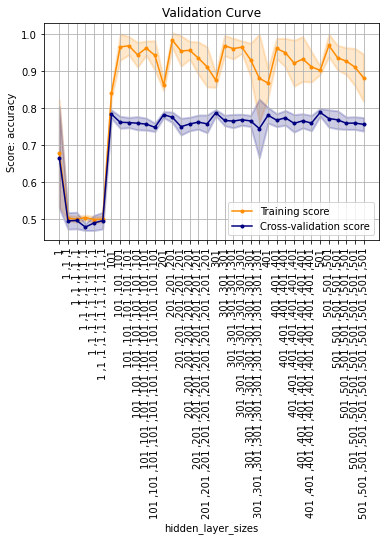

In [10]:
import pickle

num_nodes_per_layer = [i for i in range(1, 502, 100)]
num_hidden_layers = [i for i in range(1, 12, 2)]

hidden_layer_sizes = []
for num_nodes in num_nodes_per_layer:
    for num_layers in num_hidden_layers:
        tmp_hl = []
        for i in range(num_layers):
            tmp_hl.append(num_nodes)
        hidden_layer_sizes.append(tmp_hl)


hidden_layer_sizes
string_hidden_layer_size = []
for i in hidden_layer_sizes:
    temp = ""
    for ii in i:
        temp += (str(ii) + " ,")
    temp=temp[:-2]
    string_hidden_layer_size.append(temp)


if(os.path.isfile('temp_val_scores.pickle')):
    with open('temp_val_scores.pickle', 'rb') as handle:
        train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = pickle.load(handle)
else:
    train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(), X_train, y_train, 'hidden_layer_sizes', hidden_layer_sizes, 'accuracy', cv=TrainingCurves.get_cv())
    with open('temp_val_scores.pickle', 'wb') as handle:
        pickle.dump((train_scores_mean, train_scores_std, test_scores_mean, test_scores_std), handle, protocol=pickle.HIGHEST_PROTOCOL)

TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "hidden_layer_sizes", string_hidden_layer_size, title="Validation Curve", scoring="accuracy", tick_spacing=1, rotation='vertical')


Plot saved as:  Figures/FACES_NN_PLOT_GS_ModelComplexity_batch_size_learning_rate_learning_rate_init_max_iter.png


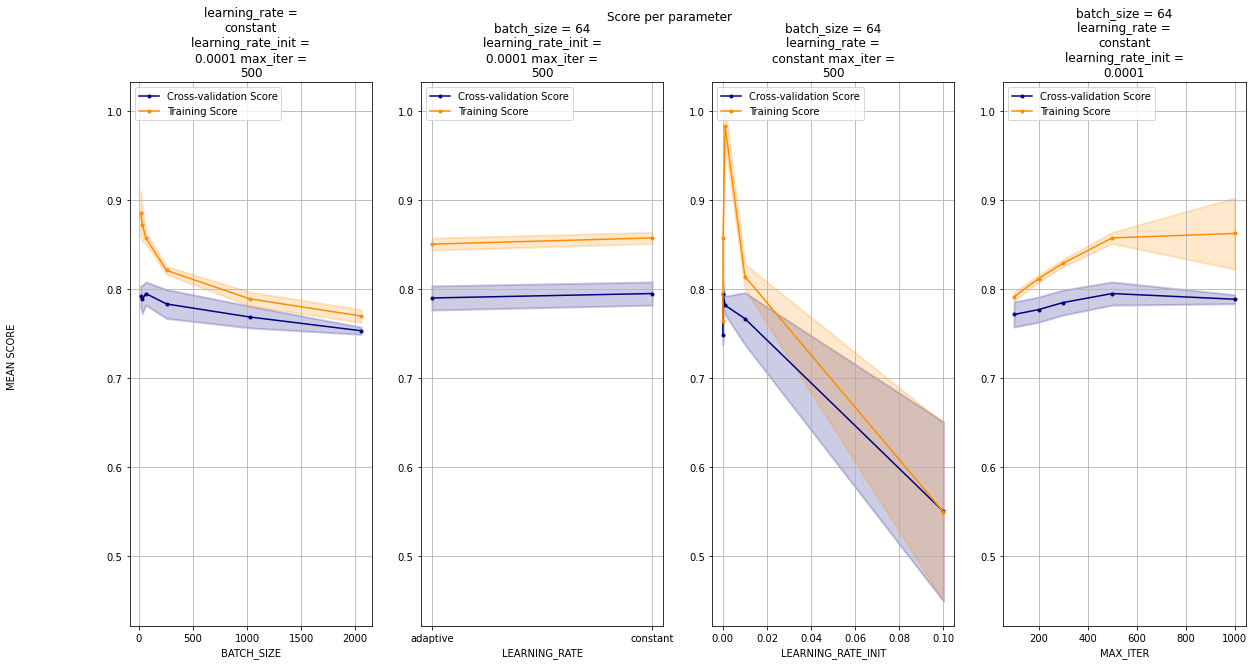

In [4]:
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX)

Plot saved as:  Figures/FACES_NN_PLOT_GS_Times_batch_size_learning_rate_learning_rate_init_max_iter.png


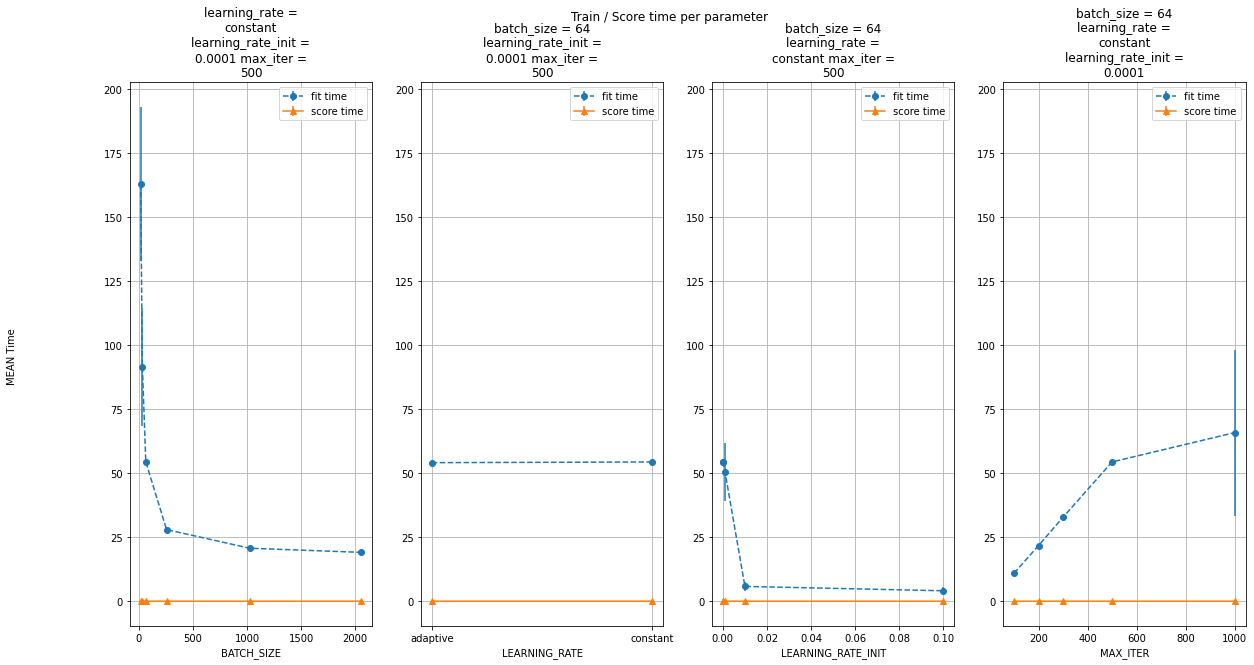

In [5]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX)

Plot saved as:  Figures/FACES_SVM_PLOT_GridScore_kernel_gamma_0.png


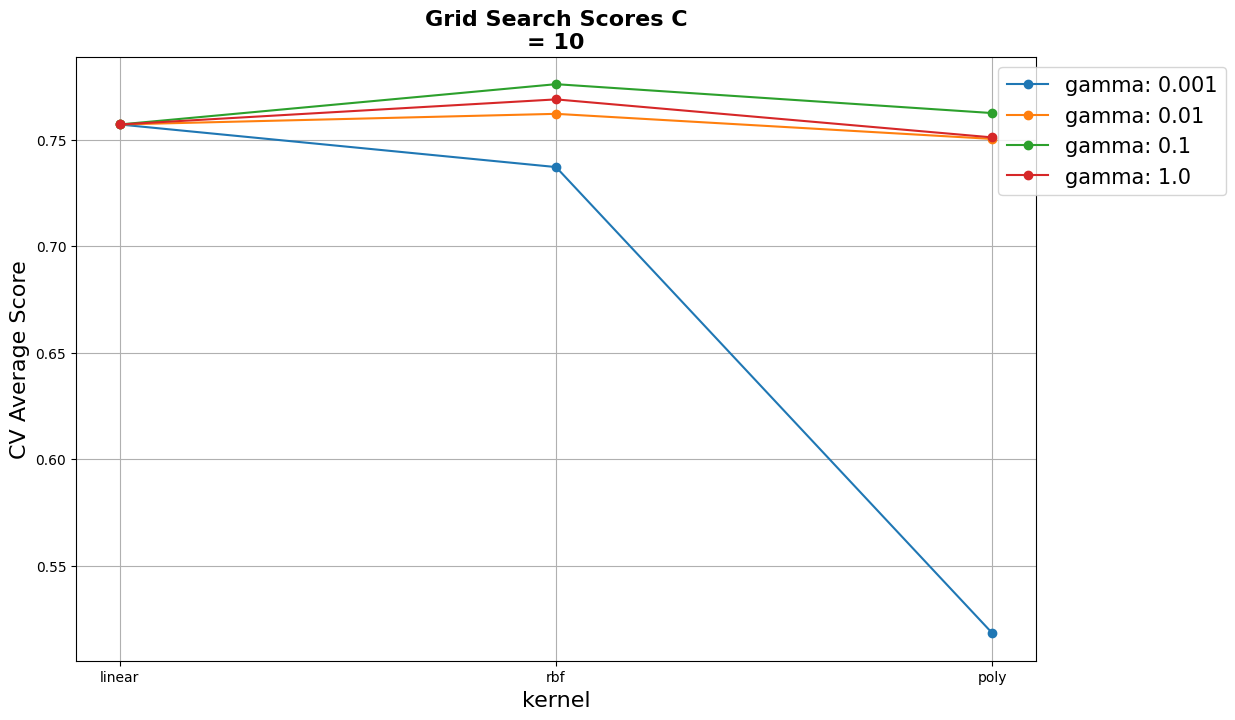

In [16]:
mean_score_limit=0.55
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'num_nodes_per_layer', 'num_hidden_layers', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_max_depth_min_samples_split_10.png


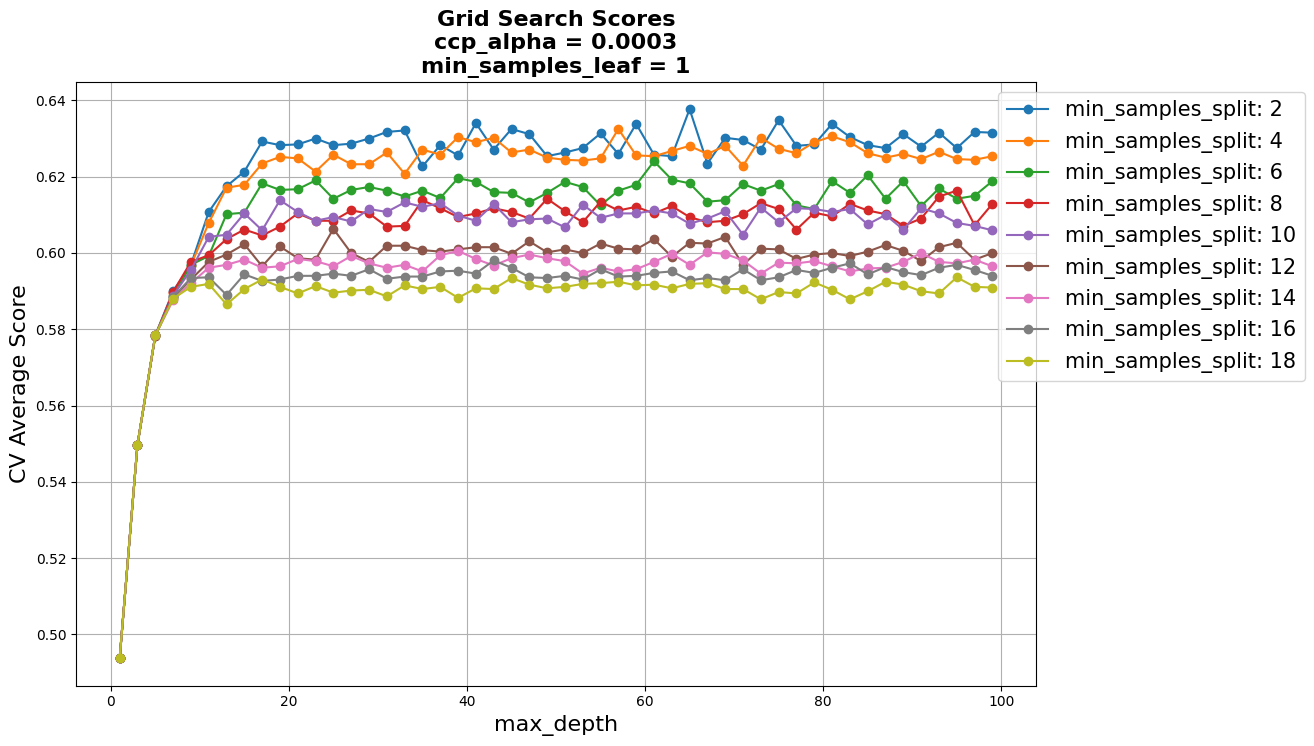